# Metropolis-Hasting sampling

In [1]:
from scipy.stats import norm
import numpy as np 

In [2]:
# 目标采样分布的概率密度函数
def p(x):
    return ((0.3 * np.exp(-(x-0.3)**2))+0.7*np.exp(-(x-2.)**2/0.3))/1.2113

In [3]:
nSample = 100000
sample2 = []

y = 1 # 设置初始值，初始状态任意

for i in range(nSample):
    
    y2 = norm(loc=y).rvs() # 从提议分布采样一个
    
    a = np.min([1, p(y2)/p(y)]) # 因为提议分布高斯是对称的, 所以可以上下约掉
    #a = np.min([0, np.log(p(y2))-np.log(p(y))]) # 因为提议分布高斯是对称的, 所以可以上下约掉

    u = np.random.rand() # 从[0,1]均匀分布获取一个值
    
    if u <= a:
        sample2.append(y2) # 接受并跳转到新的sample
        y = y2
    else:
        sample2.append(y) # 保留原来那个sample不变
    

Text(0, 0.5, 'pdf(x)')

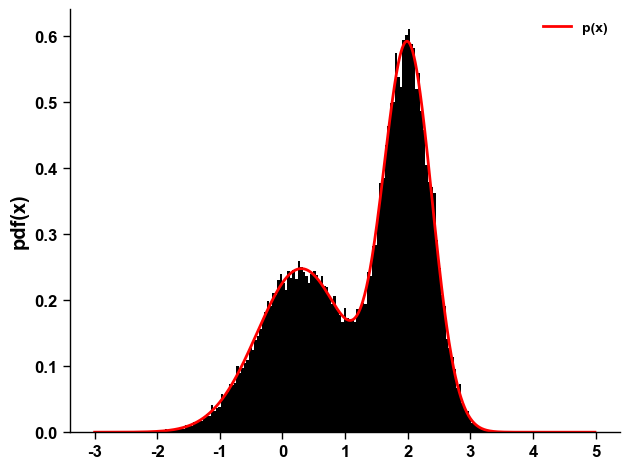

In [4]:
# 完成之后, 我们画出分布
x = np.arange(-3., 5., 0.01)
plt.plot(x, p(x), color='r', label='p(x)')
a,_,_=plt.hist(sample2, color='k', bins=150, density=True)
plt.legend()
plt.ylabel('pdf(x)')